# CODSOFT- Task 1: TITANIC SURVIVAL PREDICTION

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Load Dataset

In [2]:
titanic = pd.read_csv("tested.csv")

## Identifying shape of the Dataset 

In [3]:
titanic.shape

(418, 12)

## Displaying first 5 rows of Dataset

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##  Showing 5 sample rows from Dataset 

In [5]:
titanic.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
233,1125,0,3,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q
351,1243,0,2,"Stokes, Mr. Philip Joseph",male,25.0,0,0,F.C.C. 13540,10.5000,NaN,S
387,1279,0,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S
325,1217,0,3,"Assam, Mr. Ali",male,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
85,977,0,3,"Khalil, Mr. Betros",male,NaN,1,0,2660,14.4542,NaN,C


## Split Dataset into X and Y

In [6]:
X = pd.DataFrame(titanic.loc[ : , \
            ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])


In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [8]:
Y = pd.DataFrame(titanic.loc[:, ['Survived']])

In [9]:
Y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


### Finding unique values of Y

In [10]:
Y.Survived.unique()

array([0, 1], dtype=int64)

### Countplot of "Sex" vs. "Survived"

<Axes: xlabel='Sex', ylabel='Survived'>

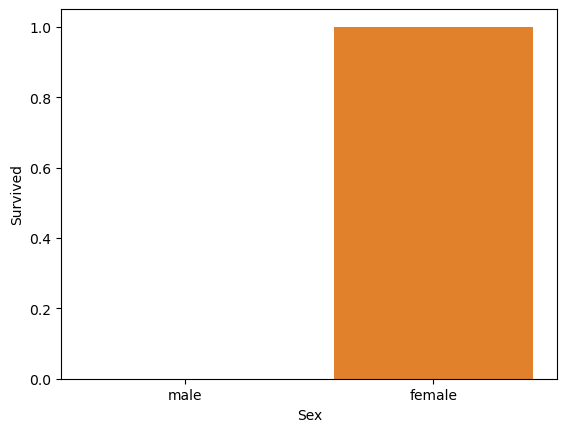

In [11]:
sns.barplot(x = X.Sex, y = Y.Survived)


### Countplot of "Pclass" vs. "Survived"

<Axes: xlabel='Pclass', ylabel='Survived'>

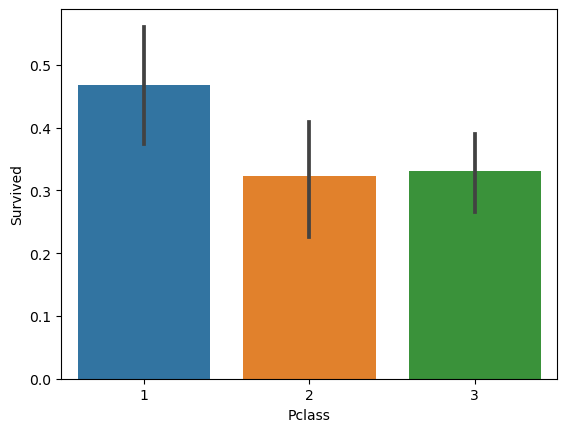

In [12]:
sns.barplot(x = X.Pclass, y = Y.Survived)

### Divide Fare into 4 bins

(array([0, 1, 2, 3]),
 [Text(0, 0, '(-0.512, 128.082]'),
  Text(1, 0, '(128.082, 256.165]'),
  Text(2, 0, '(256.165, 384.247]'),
  Text(3, 0, '(384.247, 512.329]')])

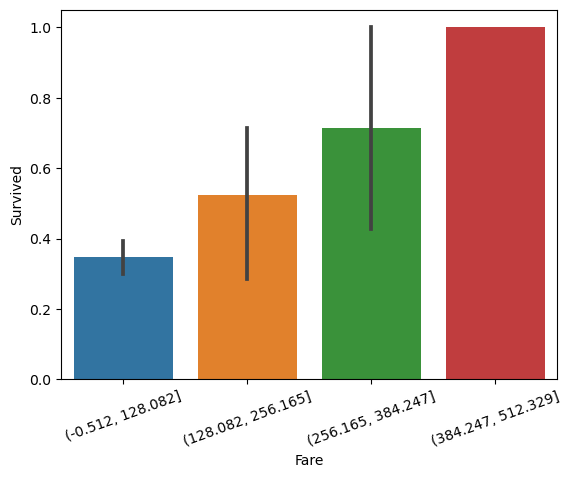

In [13]:
Fare_Range = pd.cut(X['Fare'], 4)
 
sns.barplot(x = Fare_Range, y = Y.Survived )

plt.xticks(rotation = 20)

### Divide Age into 4 bins

<Axes: xlabel='Age', ylabel='Survived'>

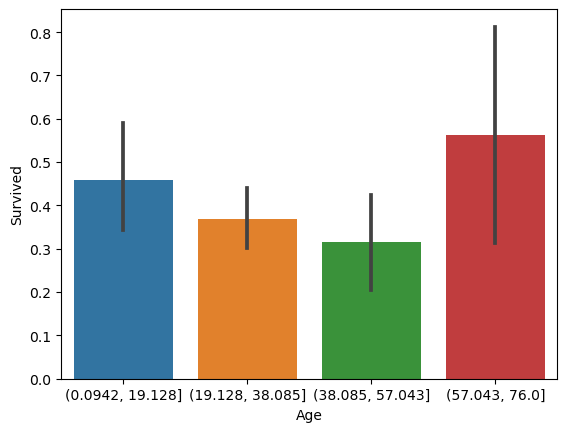

In [14]:
Age_Range = pd.cut(X['Age'], 4)
 
sns.barplot(x = Age_Range, y =Y.Survived)

### Countplot of "SibSp" vs. "Survived"

<Axes: xlabel='SibSp', ylabel='Survived'>

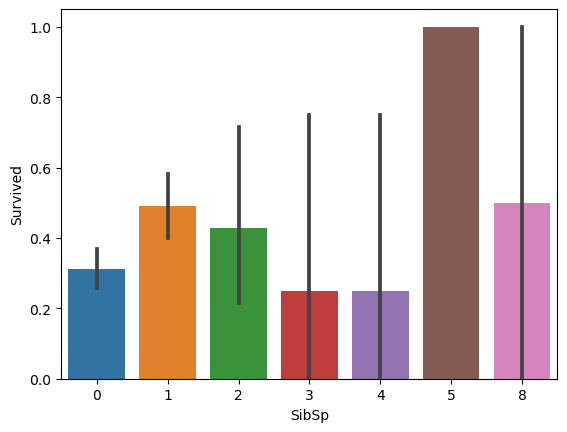

In [15]:
sns.barplot(x = X.SibSp, y = Y.Survived)


### Countplot of "Parch" vs. "Survived"

<Axes: xlabel='Parch', ylabel='Survived'>

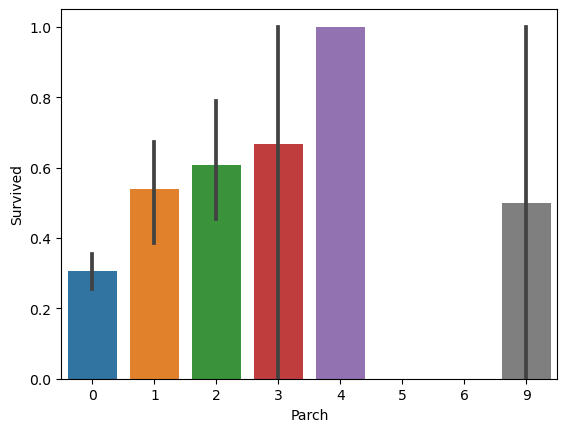

In [16]:
sns.barplot(x = X.Parch, y = Y.Survived )

### Countplot of "Embarked" vs. "Survived"

<Axes: xlabel='Embarked', ylabel='Survived'>

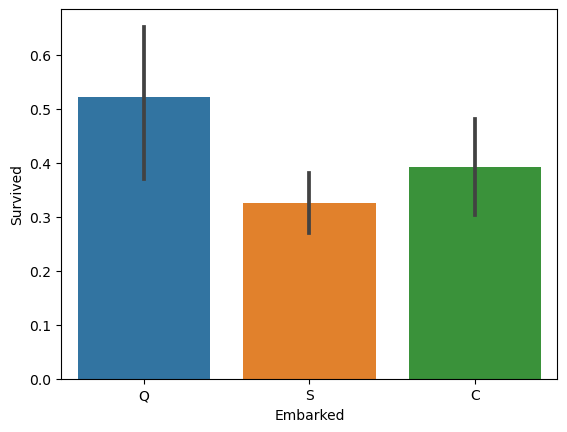

In [17]:
sns.barplot(x = X.Embarked, y = Y.Survived)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


## Finding missing values

In [19]:
print('% of missing values')
X.isnull().mean()*100

% of missing values


Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

### Filling missing "Age" fields with mean of "Age"

In [20]:
meanAge = X['Age'].mean()

meanAge

30.272590361445783

In [21]:
X['Age'].fillna( meanAge , inplace = True)

### Check that all the missing "Age" values are filled

In [22]:
X.isna().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

### Filling missing "Fare" fields with mean of "Fare"

In [27]:
meanfare = X['Fare'].mean()

meanfare

35.627188489208635

### Replacing the missing values in the “Fare” column with mode of "Fare"

In [28]:
X['Fare'].fillna( meanfare , inplace = True)

In [29]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [31]:
X.Sex.unique()

array(['male', 'female'], dtype=object)

In [32]:
X.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

### Fitting the 'Sex' attribute for label encoding

In [33]:
from sklearn import preprocessing

label_encoder_Sex = preprocessing.LabelEncoder().fit(X['Sex'])

In [34]:
X['Sex'] = label_encoder_Sex.transform(X['Sex'])

X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [35]:
label_encoder_Embarked = preprocessing.LabelEncoder().fit(X['Embarked'])

In [36]:
X['Embarked'] = label_encoder_Embarked.transform(X['Embarked'])


X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [37]:
X.corrwith(Y.Survived, method='pearson')

Pclass     -0.108615
Sex        -1.000000
Age        -0.000011
SibSp       0.099943
Parch       0.159120
Fare        0.191382
Embarked   -0.076281
dtype: float64

### Splitting into train and test

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                test_size=0.25, 
                                              random_state = 35)
X_train
    

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
377,2,1,21.00000,0,0,11.5000,2
6,3,0,30.00000,0,0,7.6292,1
239,1,0,48.00000,1,0,106.4250,0
265,3,1,30.27259,0,0,7.8958,2
82,1,1,49.00000,0,0,26.0000,2
...,...,...,...,...,...,...,...
232,3,1,21.00000,1,0,6.4958,2
249,3,0,30.27259,1,0,14.4542,0
33,3,0,30.27259,1,2,23.4500,2
271,3,1,30.27259,0,0,7.7500,1


### Training the model

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier( criterion = 'entropy' , random_state = 1 )

dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)



fig = plt.figure( figsize = (25 , 20) )

_ = tree.plot_tree( dtc, 
                   feature_names = ['Pclass' ,'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],  
                   class_names = ['Not Survived' , 'Survived'] , 
                   filled = True)

### Testing the model for accuracy of its predictions

In [41]:
Y_pred = dtc.predict(X_test)

The % of Accuracy is : 100.0


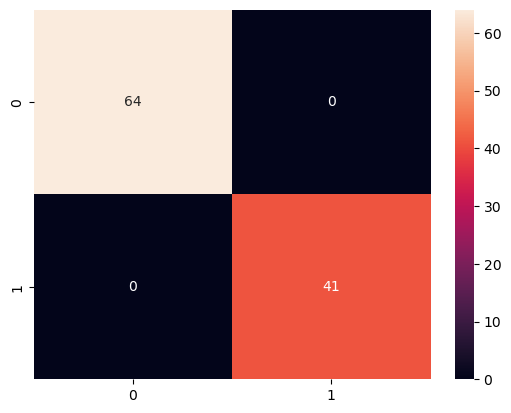

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score

# make a confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)

# display confusion matrix as a heatmap
sns.heatmap(cm, annot = True , fmt = 'd')

# compute and display the the accuracy
print('The % of Accuracy is :', accuracy_score(Y_test , Y_pred)*100)

## NUMBER GUESSING GAME task has been successfully completed by NADDIMULLA SHAIK AFSHA